# Session 8: Convolutional Neural Network

You need to read the theory lectures before practicing with this notebook:
- [Preclass S4](https://hackmd.io/@KylePaul/ML_Preclass_S8)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S8)

```{contents}

```


- **Convolution**
  - The Convolution Layer in Tensorflow is declared by
    ```python
    from tensorflow.keras.layers import Conv2D
    ```
  - As we learned in the lecture, the main components of 1 Convolution operation are:
    - Number of filters (output how many feature maps)
    - Filter size
    - Stride
    - Padding
  - The above elements are represented in the code as follows:
    ```python
    Conv2D(
      filters = ..., # number of filters
      kernel_size = ..., # filter size
      padding = 'same' or 'valid', # with padding or not, the number of padding is calculated automatically
      strides = (..., ...) # Vertical and horizontal step of filters
    )
    ```
- **Max Pooling**
  - Max Pooling Layer is declared as follows
    ```python
    from tensorflow.keras.layers import MaxPool2D
    ```
  - Representation in code
    ```python
    # Layer MaxPool2D has following default values:
    pool_size (similar to kernel_size) = 2
    strides = 2
    padding = 'valid'
    # So when using, we just need to simply call as follows:
    MaxPool2D()
    ```

#### TODO 1

Let's design a `Sequential` model consisting of 1 Convolution layer and 1 Max Pooling layer according to the following description:
  - The input model is `100x100x3` images
  - Convolution Layer:
    - 32 Feature map
    - Filter size is `5x5`
    - The size of each feature map is equal to the input size
  - Max Pooling Layer reduces feature map size by 1 half
- After design, run the command `model.summary()`

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Input, Flatten

model = Sequential()
model.add(Input(shape=(10, 10, 3)))
model.add(Conv2D(32, 5, padding="same", activation='relu', name='Conv2d_1'))
model.add(MaxPool2D(name="max_pooling2d_1"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2d_1 (Conv2D)           (None, 10, 10, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [ ]:
5*5*32*3 + 32

2432

In [ ]:
2 * (5 * 5 * 100 * 100 * 3 * 32)

48000000

#### TODO 2
- Explain the number of `trainalbe params`
- FLOPs ⟷ the number of operations (multiplication and addition) that occur in 1 forward pass, for simplicity, calculate the number of multiplications that occur in the above model
- FLOPS ⟷ in 1 second, how many calculations our hardware is capable of. If we know this information, we can approximate the processing speed.

# MNist Fashion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

def reset_random_seeds(CUR_SEED=42):
   os.environ['PYTHONHASHSEED']=str(CUR_SEED)
   tf.random.set_seed(CUR_SEED)
   np.random.seed(CUR_SEED)
   random.seed(CUR_SEED)

reset_random_seeds()

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)
print('-'*10)
print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)
print('-'*10)
print('Labels:',np.unique(y_train))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
----------
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)
----------
Labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

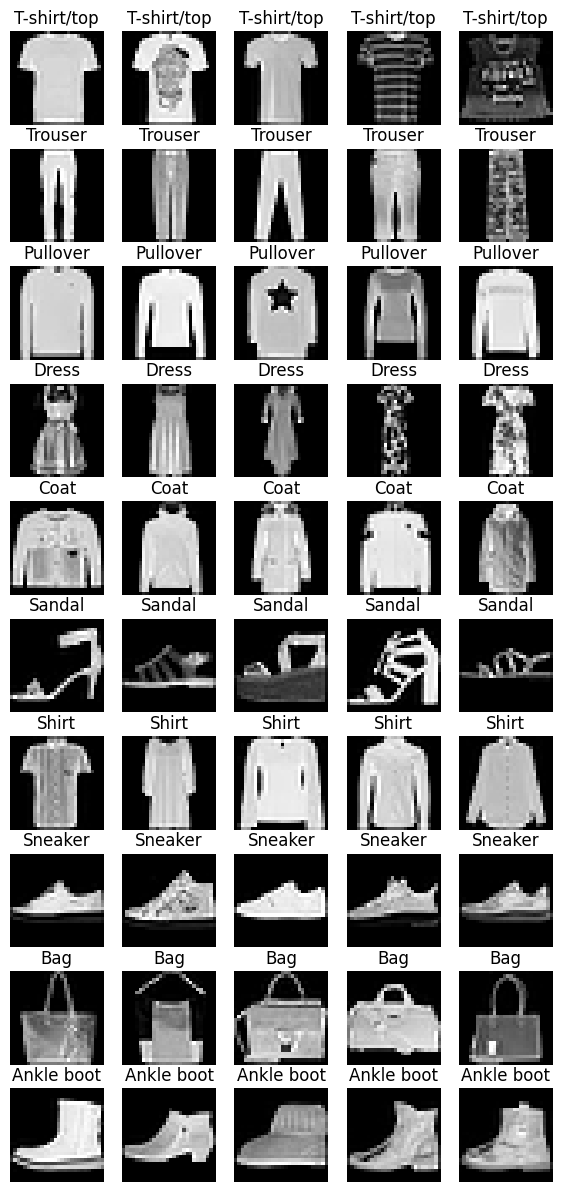

In [ ]:
rows = 10
cols = 5
_, axs = plt.subplots(nrows=rows,ncols=cols, figsize=(7,15))
for row in range(rows):
  for col in range(cols):
    random_index = np.random.choice(np.where(y_train == row)[0])
    axs[row][col].grid('off')
    axs[row][col].axis('off')
    axs[row][col].imshow(x_train[random_index], cmap='gray')
    axs[row][col].set_title(labels[y_train[random_index]])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encode = tf.keras.utils.to_categorical(y_test, num_classes=10)

#### TODO 3

Build a CNN model with the following architecture, naming the variable `model_1`:
- 3 blocks (1 layer Convolution, 1 layer BatchNorm, 1 activation relu, 1 layer Max Pooling)
  - The first block produces 32 feature maps, the next blocks multiply the number of feature maps by 2
  - Layer Convolution does not change input size
  - Layer Convolution has a jump of 1
  - The input size is reduced by 1 more after each Max Pooling
- Flatten layer to transform feature map into vector
- Layer Fully Connected + BatchNorm gives a vector of size of 128
- Fully Connected layer to predict results


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Input, Activation, MaxPool2D

tf.keras.backend.clear_session()
reset_random_seeds()

model_1 = Sequential()
model_1.add(Input(shape=(29,28,1)))

model_1.add(Conv2D(32, 3, padding="same", use_bias=False))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D())

model_1.add(Conv2D(64, 3, padding="same", use_bias=False))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D())

model_1.add(Conv2D(128, 3, padding="same", use_bias=False))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D())
# model_1.add(Conv2D(128, 3, strides=(2), padding="same", activation='relu'))

model_1.add(Flatten())
model_1.add(Dense(128, use_bias=False))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 28, 32)        288       
                                                                 
 batch_normalization (BatchN  (None, 29, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 29, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18432     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [ ]:
# Note that using dropout in fully-connected layers is 0.5 and in convolutional neural net it is 0.2
# Very rare use of dropout with Batchnorm (should only be with L2 regularization)

In [ ]:
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
model_1.fit(x_train, y_train_encode, batch_size=100, epochs=5, validation_data=(x_test, y_test_encode))

# Tensorflow Keras Model API

Is another way to build a model. Unlike the `Sequential` API, when using the `Model` we must:
- Must connect layers manually
- Declare the first layer and the last layer

Code example of `model_1` but using `Model API` instead of `Sequential`

In [ ]:
tf.keras.backend.clear_session()
reset_random_seeds()

def ConvBatchNormRelu(input, filters, kernel_size, padding, kernel_initializer, activation):
  conv = Conv2D(
      filters=filters,
      kernel_size=kernel_size,
      padding=padding,
      kernel_initializer=kernel_initializer,
      use_bias=False)(input)
  bn = BatchNormalization()(conv)
  relu = Activation(activation)(bn)
  return relu

input_ = Input(shape=(28,28,1))
conv_group_1 = ConvBatchNormRelu(input_, 32, 3, "same", "he_normal", "relu")
max_pool_1 = MaxPool2D()(conv_group_1)

conv_group_2 = ConvBatchNormRelu(max_pool_1, 64, 3, "same", "he_normal", "relu")
max_pool_2 = MaxPool2D()(conv_group_2)

conv_group_3 = ConvBatchNormRelu(max_pool_2, 128, 3, "same", "he_normal", "relu")
max_pool_3 = MaxPool2D()(conv_group_3)

flatten = Flatten()(max_pool_3)
dense_1 = Dense(128, kernel_initializer="he_normal", use_bias=False)(flatten)
bn_1 = BatchNormalization()(dense_1)
act_1 = Activation("relu")(bn_1)
output = Dense(10, activation="softmax", kernel_initializer="glorot_normal")(act_1)

model = Model(input_, output)
model.summary()

In [ ]:
tf.keras.backend.clear_session()
reset_random_seeds()

# Instead of naming each layer variables, you can write all variable names as X
# Just separate the proper names for the input and ouput layers

input_ = Input(shape=(28,28,1))

x = ConvBatchNormRelu(input_, 32, 3, "same", "he_normal", "relu")
x = MaxPool2D()(x)
x = ConvBatchNormRelu(x, 64, 3, "same", "he_normal", "relu")
x = MaxPool2D()(x)
x = ConvBatchNormRelu(x, 128, 3, "same", "he_normal", "relu")
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(128, kernel_initializer="he_normal", use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

output = Dense(10, activation="softmax", kernel_initializer="glorot_normal")(x)

model = Model(input_, output)

model.summary()

#### TODO 4

![](https://i.imgur.com/GiYuOXb.png)

Build the CNN model below, naming the variable `model_2`:
- Includes 2 blocks simulating the drawing above
  - Use layer `add` for addition `add([layer1, layer2])`
  - Block 1: 64 feature map (image above) + Convolution to halve the size and increase the number of features to 128
  - Block 2: 128 feature map (similar to Block 1) + Flatten to transform input into vector
- Layer Fully Connected + BatchNorm yields a vector with a size of 128
- Addd fully-connected layer to predict results





In [ ]:
from tensorflow.keras.layers import add
tf.keras.backend.clear_session()
reset_random_seeds()

input_ = Input(shape=(28,28,1))
x = Conv2D(64, 3, activation="relu", padding="same", strides=2, kernel_initializer="he_normal",)(input_)


#Initialize the model and use the summary function to adjust the shape gradually
model_2 = Model(input_, x)
model_2.summary()

![](https://i.imgur.com/8eHCZkO.png)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True, show_layer_activations=True)

# Separable Convolution

![Image Source: https://www.thinkautonomous.ai/blog/deep-learning-optimization/](https://i.imgur.com/3wWKL8c.png)

In [ ]:
model = Sequential()
model.add(Conv2D(512, 3, input_shape=(100,100,256)))
model.summary()

In [ ]:
# Separable Convolutions
from tensorflow.keras.layers import SeparableConv2D
model = Sequential()
model.add(SeparableConv2D(512, 3, input_shape=(100,100,256)))

model.summary()

## Vgnet architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# build a augmentation pipeline with tensorflow
augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
])

# Build a CNN network (must have rescaling)
# Use mulitple blocks of Convolutiion - Batch Normalization - Relu activation function
# follow the VGG-16 architecture
# Use SeparableConv2D instead of Conv2D and GlobalAveragePooling2D instead of Flatten to reduce parameters must be trained.

cnn = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(500, 500, 3)),
  layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.SeparableConv2D(256, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(256, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(256, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.SeparableConv2D(512, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),

])

# Connect Augmentation Pipeline and CNN using another Sequential
model = models.Sequential([
    augmentation,
    cnn,
    # Use GlobalAveragePooling2D instead of Flatten to reduce parameters must be trained.
    # Add a final Dense layer with softmax activation for classification
    # Assume there are two classes in the labels
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation="softmax")
])

# Then train the model (with tensorflow) and predict on test_image set
# Choose small batchsize to avoid out of memory

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_image, train_label, batch_size=8, epochs=10)

predictions = model.predict(test_image)